A simulation exercise:
What is the probability that 2 or more people in a group of 30 people will share the same birthday?

In [1]:
from matplotlib import pyplot as plt
from numpy import mean, unique, random as r
from pandas import date_range
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")

In [4]:
def is_dup(vec):
    """
    Determines whether input array has any duplicate dates.

    Parameters
    ----------
    vec : 1d-array
        array of randomly sampled dates

    Returns
    -------
    boolean
        indicator of whether array contains any duplicate dates
    """
    u, c = unique(vec, return_counts=True)
    return True if len(u[c > 1]) >= 1 else False

In [5]:
def run_simulation(nsim, nsamp):
    """
    Calculate the percent of <nsim> simulations that have 
    duplicate dates. Each simulation samples with replacement 
    <nsamp> dates.

    Parameters
    ----------
    nsim : integer
        number of simulations to run
    nsamp : integer
        number of dates to sample per simulation

    Returns
    -------
    float
        percent of simulations with duplicate dates
    """
    d = (date_range('2020-01-01', '2020-12-31', freq='D')
         .strftime('%b-%d')
         .tolist())
    cnt = 0
    for _ in range(nsim):
        if is_dup(r.choice(d, size=nsamp, replace=True)):
            cnt += 1
    return cnt / nsim

In [6]:
results = [run_simulation(nsim=1000, nsamp=30) for _ in range(1000)]

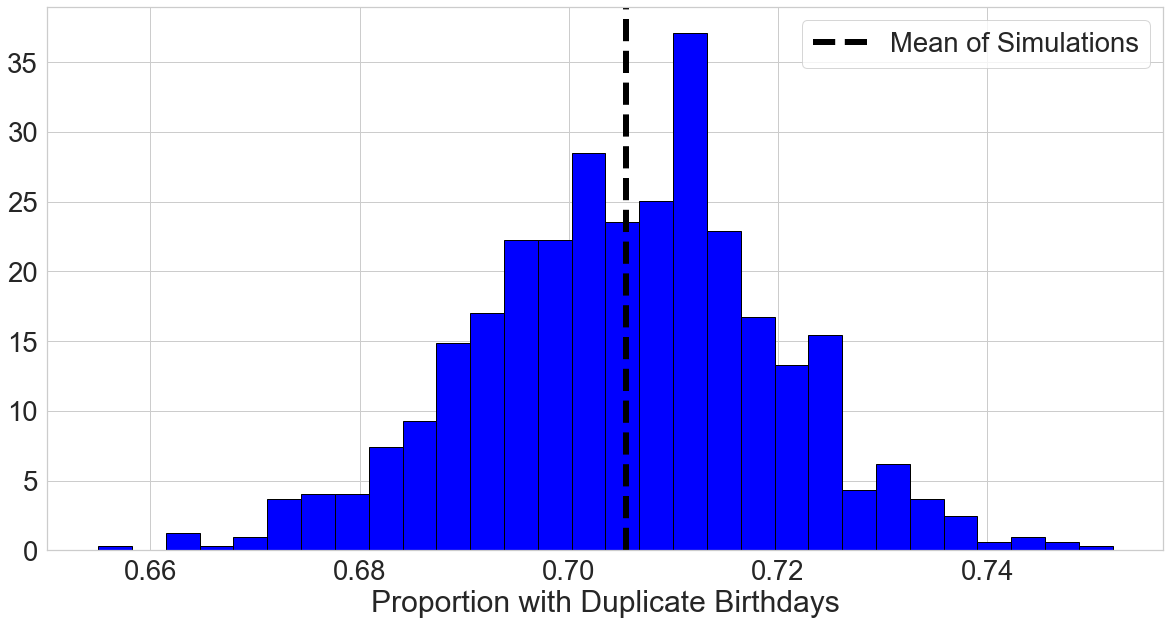

In [7]:
plt.hist(results, density=True, bins=30, color='blue', edgecolor='black')
plt.axvline(x=mean(results), label='Mean of Simulations',
            linestyle='dashed', linewidth=6, color='black')
plt.xlabel('Proportion with Duplicate Birthdays')
plt.ylabel('')
plt.legend()
plt.show(block=True)